In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 

import os

In [2]:
data = pd.read_csv("titanic.csv",sep=",")


In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data1 = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]
data1.head()
data1.info()
data2=data1.dropna(axis=0).reset_index(drop=True)



def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data2, 5)
kmeans = pd.DataFrame(clust_labels)
data2.insert((data2.shape[1]),'kmeans',kmeans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [5]:
data2.groupby('kmeans').mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
kmeans,,,,,,
0,0.335106,2.515957,28.417110,0.437943,0.381206,15.684034
1,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940
2,0.733333,1.000000,32.430667,0.600000,0.866667,131.183883
3,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.637255,1.274510,35.725490,0.843137,0.450980,67.193180


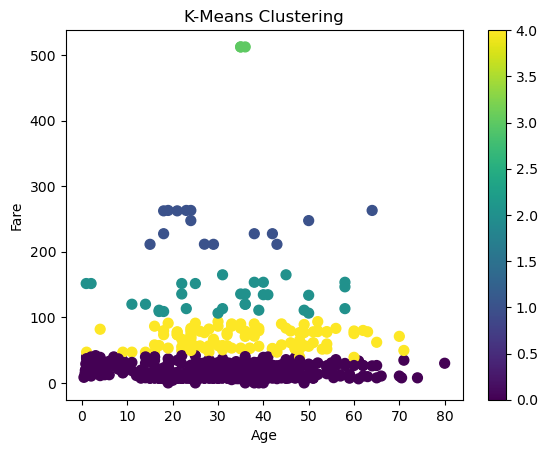

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)